In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import copy

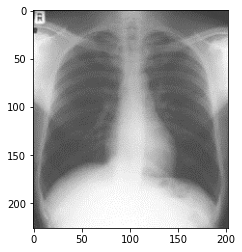

In [3]:
img = cv2.imread('./Lab_Images/imageQ1.jpg', 0)
plt.imshow(img, 'gray', vmin=0, vmax=255)
#如果这里不加vmin=0，vmax=255。那么plt显示的图像的对比度将和做过拉伸的图像一致

In [4]:
print(np.min(img))
print(np.max(img))
# 可以注意到此时图片的灰度最小值不为0, 所以我们需要进行对比度拉伸。

61
255


In [7]:
#Question 1
a, b = 0., 255.
c, d = np.min(img), np.max(img)
img_O = (img - c) * ((b-a) / (d-c)) + a

In [8]:
print(np.min(img_O))

0.0


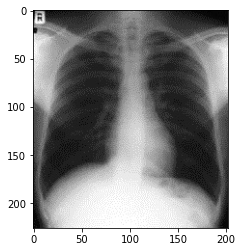

In [9]:
plt.imshow(img_O, 'gray')

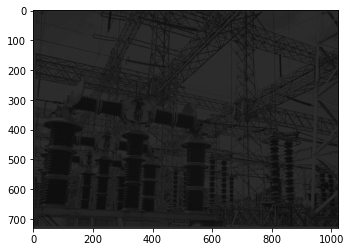

In [10]:
# Task 2
img21 = cv2.imread('./Lab1_Images/imageQ21.jpg', 0)
plt.imshow(img21, 'gray', vmin=0, vmax=255)

<BarContainer object of 256 artists>

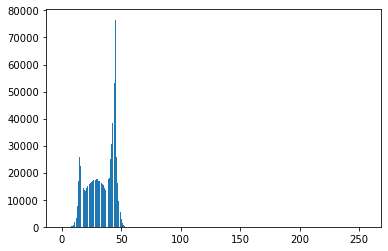

In [11]:
row, col = img21.shape

gray_level = [0 for x in range(0, 256)] #这里开0到256，是因为range本身是左闭右开的空间
for r in range(row):
    for c in range(col): 
        # 逐个像素扫描，并统计
        gray_level[img21[r,c]] += 1 

plt.bar(x=range(0,256), height = gray_level)

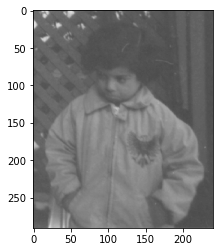

In [12]:
img22 = cv2.imread('./Lab1_Images/imageQ22.tif', 0)
plt.imshow(img22, 'gray', vmin=0, vmax=255)

<BarContainer object of 256 artists>

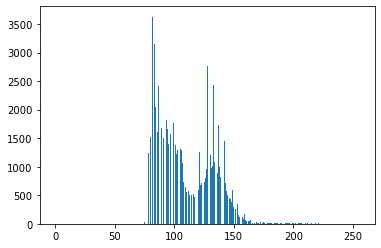

In [13]:
row, col = img22.shape

gray_level = [0 for x in range(0, 256)] #这里开0到256，是因为range本身是左闭右开的空间
for r in range(row):
    for c in range(col): 
        # 逐个像素扫描，并统计
        gray_level[img22[r,c]] += 1 

plt.bar(x=range(0,256), height = gray_level)

In [14]:
# 归一化
pixel_number = img22.size
p = [0 for x in range(0, 256)]
for i in range(0, 256):
    p[i] = gray_level[i] / pixel_number
    
# 计算累计直方图
c_p = [0 for x in range(0, 256)]
c_p[0] = p[0]
for i in range(1, 256):
    c_p[i] = c_p[i-1] + p[i]
# plt.bar(x=range(0,256), height = c)
# print(c)

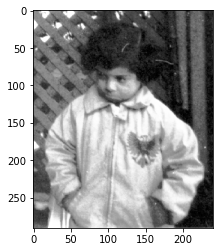

In [15]:
# 计算新像素的值
new_img = copy.deepcopy(img22) #采用deep copy就不会修改到原图img22的值。因为python本身是内存索引机制
for r in range(row):
    for c in range(col):
        index = int(img22[r,c])
        new_img[r,c] = 255 * c_p[index]

plt.imshow(new_img, 'gray')

<BarContainer object of 256 artists>

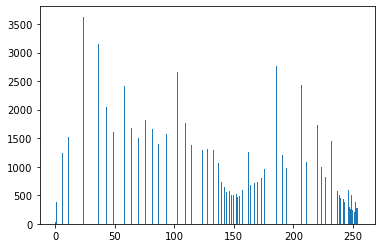

In [16]:
#新图的直方图
gray_level_new = [0 for x in range(0, 256)] #这里开0到256，是因为range本身是左闭右开的空间
for r in range(row):
    for c in range(col): 
        # 逐个像素扫描，并统计
        gray_level_new[new_img[r,c]] += 1 

plt.bar(x=range(0,256), height = gray_level_new)

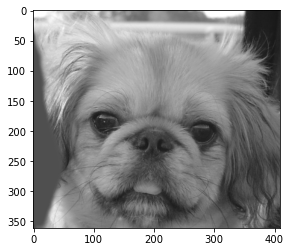

In [17]:
# Task 3
img3 = cv2.imread('./Lab1_Images/imageQ3.jpg', 0)
plt.imshow(img3, 'gray', vmin=0, vmax=255)

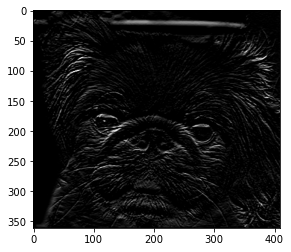

In [18]:
# 一种解法
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

sbl_x = cv2.filter2D(img3, -1, sobel_x) #这里的-1，表示的是保持和原图一样的数据类型
sbl_y = cv2.filter2D(img3, -1, sobel_y)

plt.imshow(sbl_x, cmap='gray', vmin=0, vmax=255)
plt.imshow(sbl_y, cmap='gray', vmin=0, vmax=255)

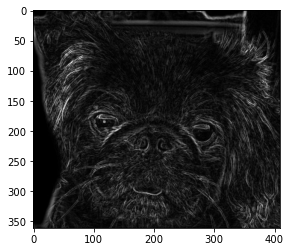

In [19]:
#另一种解法
x = cv2.Sobel(img3,cv2.CV_16S,1,0) #这里的cv2.CV_16S指的就是数据类型。还有很多别的，相比unit8是不带符号，16S就是多带了个符号。
y = cv2.Sobel(img3,cv2.CV_16S,0,1)

absX = cv2.convertScaleAbs(x)   # 转回uint8
absY = cv2.convertScaleAbs(y)
 
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)

plt.imshow(dst, 'gray', vmin=0, vmax=255) #可以看到效果要比上面分开来显示要好一些，因为多了上述合成的这一步，会增加一些部位的幅值。

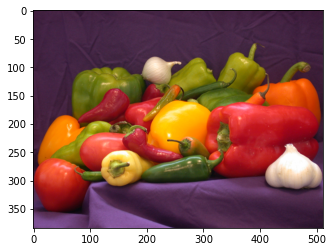

In [21]:
# Task 4
img4 = cv2.imread('./Lab1_Images/imageQ42.png') # 这里读的是彩图
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB) # 这里cv2.COLOR_BGR2RGB就是一种转换形式
plt.imshow(img4_rgb)

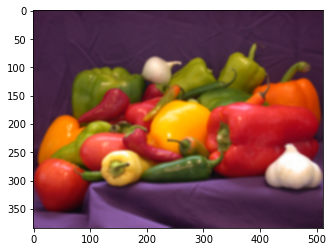

In [22]:
#Mean filter
mean_img4_rgb = cv2.blur(img4_rgb, (5,5)) #调整kernel size会改变图片的模糊程度
plt.imshow(mean_img4_rgb)

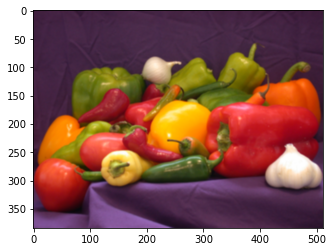

In [23]:
#GaussianBlur
gaussian_img4_rgb = cv2.GaussianBlur(img4_rgb, (3,3), 5) #可以调整kernel size 和最后的模糊系数来改变图片的模糊程度
plt.imshow(gaussian_img4_rgb)

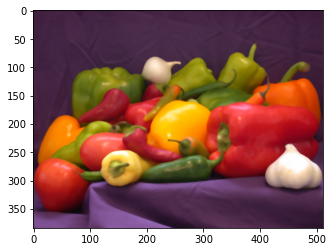

In [24]:
#medianBlur
median_img4_rgb = cv2.medianBlur(img4_rgb, 5) 

#这里的kernel size只需要给常数，不需要给tuple。 由于图片没有什么胡椒盐噪声。所以只有模糊的效果
plt.imshow(median_img4_rgb)

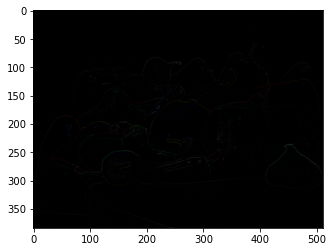

In [26]:
# High-pass filtered image
mask = cv2.subtract(img4_rgb, gaussian_img4_rgb)
plt.imshow(mask)
# cv2.subtract
# output = img + alpha * mask

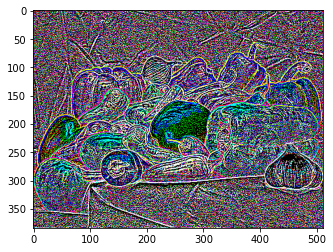

In [27]:
#如果不用cv2.subtract
mask_test = img4_rgb - gaussian_img4_rgb
plt.imshow(mask_test)
#这是因为减出了负数或是大于255的uint8数，会自动回滚。负数变成255，大于255的变成0。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


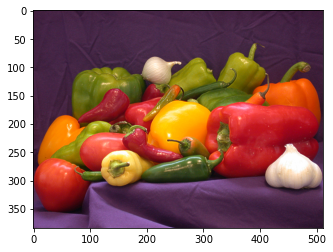

In [28]:
output_img4 = (img4_rgb + 1.3 * mask) / 255 #如图不/255，接.astype('uint8')也会导致回滚。因为用的是普通的加法
plt.imshow(output_img4)
#用cv2.addweighted也是可以的。

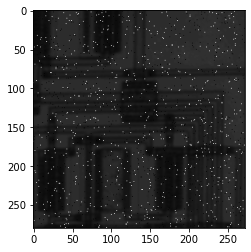

In [29]:
# Task 5
img5 = cv2.imread('./Lab1_Images/imageQ5.png', 0)
plt.imshow(img5, 'gray', vmin=0, vmax=255)

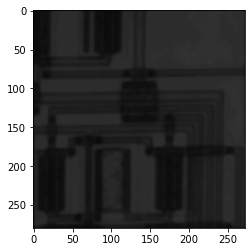

In [30]:
#首先进行去胡椒盐噪声的操作
median_img5 = cv2.medianBlur(img5, 5)
plt.imshow(median_img5, 'gray', vmin=0, vmax=255)

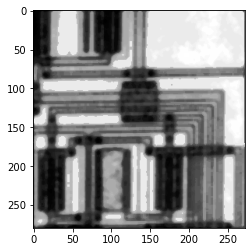

In [31]:
# 做直方图均衡，提升对比度
row_5, col_5 = median_img5.shape

gray_level_5 = [0 for x in range(0, 256)] #这里开0到256，是因为range本身是左闭右开的空间
for r in range(row_5):
    for c in range(col_5): 
        # 逐个像素扫描，并统计
        gray_level_5[median_img5[r,c]] += 1 
# 归一化
pixel_number_5 = img5.size
p_5 = [0 for x in range(0, 256)]
for i in range(0, 256):
    p_5[i] = gray_level_5[i] / pixel_number_5
    
# 计算累计直方图
c_p_5 = [0 for x in range(0, 256)]
c_p_5[0] = p_5[0]
for i in range(1, 256):
    c_p_5[i] = c_p_5[i-1] + p_5[i]
# 计算新像素的值
new_img_5 = copy.deepcopy(median_img5) 
for r in range(row_5):
    for c in range(col_5):
        index_5 = int(median_img5[r,c])
        new_img_5[r,c] = 255 * c_p_5[index_5]

plt.imshow(new_img_5, 'gray')
#要注意是对中值模糊后的结果进行直方图均衡

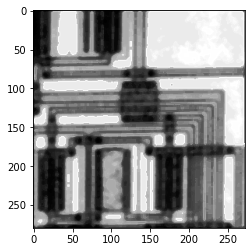

In [32]:
# 最后进行锐化的步骤
gaussian_img5 = cv2.GaussianBlur(new_img_5, (3,3), 5) 
mask_5 = cv2.subtract(new_img_5, gaussian_img5)
output_img5 = cv2.addWeighted(new_img_5, 1, mask_5, 1.4, 0)
plt.imshow(output_img5, 'gray', vmin=0, vmax=255)

In [33]:
#最后的最后，要进行对比度拉升 (可以看到的是这里其实最小值，最大值已经都符合要求了。所以其实可以不做对比度拉伸。)
print(np.min(output_img5))
print(np.max(output_img5))

0
255


In [34]:
#规范起见 依然执行一下
a_5, b_5 = 0., 255.
c_5, d_5 = np.min(output_img5), np.max(output_img5)
img_O_5 = (output_img5 - c_5) * ((b_5-a_5) / (d_5-c_5)) + a_5

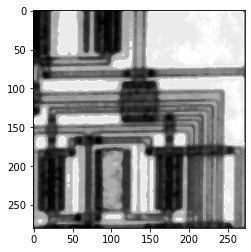

In [35]:
plt.imshow(img_O_5, 'gray')
